# **Insper - Eletromagnetismo e Ondulatória** #


### **Projeto WPT**

Grupo
- Caio Aranha
- Joseph Neto
- Leonardo França
- Rafael Leventhal

### Importando bibliotecas

In [2]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Elaboração do diagrama do modelo eletrodinâmico do circuito WPT

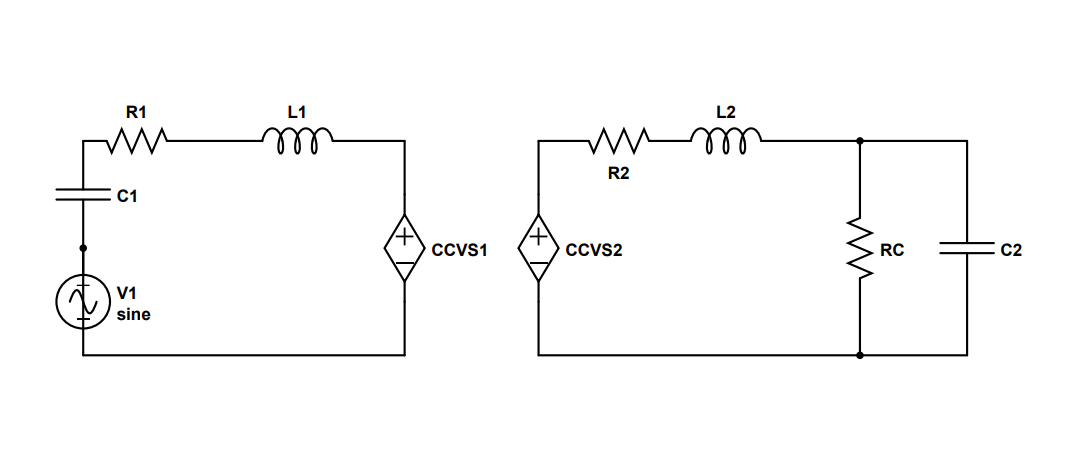

In [3]:
#Imagem do circuito
from IPython.display import Image
Image(filename='circuito.png')


## 1.2 Código do modelo numérico
### Definindo variáveis referentes ao curcuito


In [4]:
#implemente seu código aqui
r1 = 1.528
r2 = 1.395
l1 = 0.0004698
l2 = 0.0004121

k = 0.3
k1 = 0.6
k2 = 0.9	
listak = [k, k1, k2]

c1 = 1e-7
c2 = 1e-7

rc = 100


wProj = 1/(sqrt(l1*c1))
fProj = wProj/(2*pi)
print("Frequência de Projeto = ", fProj.real, "Hz")


Frequência de Projeto =  23220.07538820991 Hz


## Calculando os Gráficos das etapas 1.3 e 1.4
- Gráfico de valores das correntes I1 e I2 em função das frequências
- Potências de entrada e saida em frequencias variadas
- Ganho de Potência


150830


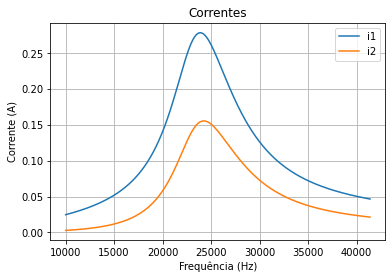

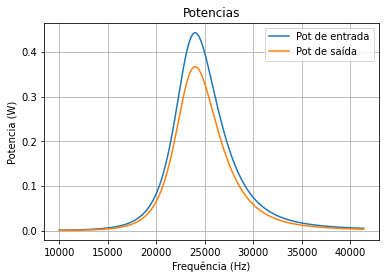

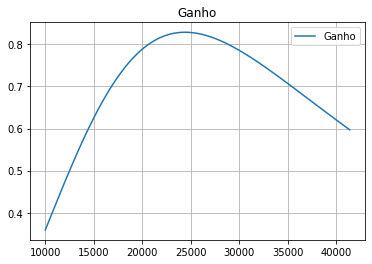

24247.255580050256


In [5]:
# implemente seu código aqui
wideal = 1/(sqrt(l1*c1))

# fazer array de 1600 até 2000 com intervalos de 10
izeros = []
Is1 = []
Is2 =[]
Ps1 = []
Ps2 = []
wArray = np.arange(62_900, 260_000, 10)
fArray = wArray/(2*np.pi)
for w in wArray:
    m = k * ((l1*l2)**0.5)
    xc1 = 1 / (1j*w*c1)
    xc2 = 1 / (1j*w*c2)
    xl1 = 1j * w * l1
    xl2 = 1j * w * l2
    xm = 1j * w * m

    v1 = (2/pi)*5
    rc = 100
    zpal = (xc2*rc)/(xc2+rc)
    Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
    V = np.array([v1, 0])
    I = np.dot(linalg.inv(Z), V)
    Is1.append(abs(I[0]))
    Is2.append(abs(I[1]))
    izeros.append([I[0], I[1], rc, xc2, w])

    i1 = I[0]
    i2 = I[1]
    

    v2 = i2*zpal
    
    ic = v2/rc
    v2check = ic*rc

    
    uf = i1*(r1+xl1+xc1) - i2*xm
    p1 = (uf*i1.conjugate())/2

    p2 = (v2*ic.conjugate())/2
    
    Ps2.append(p2.real)
    Ps1.append(p1.real)
 

i1, i2, rc, xc2, w = max(izeros, key=lambda item: item[0])
v2 = i2 * (rc * xc2) / (rc + xc2)
print(w)



plt.plot(fArray, Is1, label='i1')
plt.plot(fArray, Is2, label='i2')
# plt.axis([900, 950, 0, 12])
plt.title('Correntes')
plt.grid()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Corrente (A)')
plt.legend()
plt.show()






plt.plot(fArray, Ps1, label='Pot de entrada')
plt.plot(fArray, Ps2, label='Pot de saída')
# plt.axis([900, 950, 0, 300])
plt.grid()
plt.title('Potencias')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potencia (W)')
plt.legend()

plt.show()

ganho = []
for p1,p2 in zip(Ps1, Ps2):
    g = p2/p1
    g= g.real
    ganho.append(g)
plt.plot(fArray, ganho, label='Ganho')
plt.title('Ganho')
plt.legend()
plt.grid()
plt.show()

print(fArray[Is2.index(max(Is2))])




### Gráfico de valores das correntes em função das frequências em 3 diferentes valores de k


150830
226280
116520


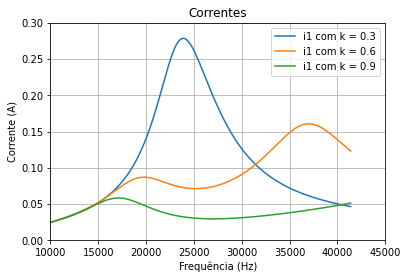

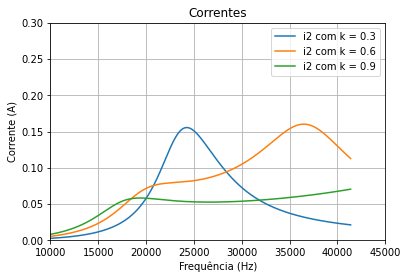

In [6]:
# implemente seu código aqui
wideal = 1/(sqrt(l1*c1))
listak= [0.3, 0.6, 0.9]
knomes = ['k = 0.3', 'k = 0.6', 'k = 0.9']	
# fazer array de 1600 até 2000 com intervalos de 10
izeros = []
Is1 = []
Is2 =[]
Ps1 = []
Ps2 = []
wArray = np.arange(62_900, 260_000, 10)
fArray = wArray/(2*np.pi)
for k, nome in zip(listak, knomes):
    izeros = []
    Is1 = []
    Is2 =[]
    Ps1 = []
    Ps2 = []
    for w in wArray:
        m = k * ((l1*l2)**0.5)
        xc1 = 1 / (1j*w*c1)
        xc2 = 1 / (1j*w*c2)
        xl1 = 1j * w * l1
        xl2 = 1j * w * l2
        xm = 1j * w * m

        v1 = (2/pi)*5
        rc = 100
        zpal = (xc2*rc)/(xc2+rc)
        Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
        V = np.array([v1, 0])
        I = np.dot(linalg.inv(Z), V)
        Is1.append(abs(I[0]))
        Is2.append(abs(I[1]))
        izeros.append([I[0], I[1], rc, xc2, w])

        i1 = I[0]
        i2 = I[1]
        

        v2 = i2*zpal
        
        ic = v2/rc
        v2check = ic*rc

        
        uf = i1*(r1+xl1+xc1) - i2*xm
        p1 = (uf*i1.conjugate())/2

        p2 = (v2*ic.conjugate())/2
        
        Ps2.append(p2.real)
        Ps1.append(p1.real)
    

    i1, i2, rc, xc2, w = max(izeros, key=lambda item: item[0])
    v2 = i2 * (rc * xc2) / (rc + xc2)
    print(w)


    plt.figure(0)
    plt.plot(fArray, Is1, label='i1 com '+nome)

    # plt.axis([900, 950, 0, 12])
    plt.title('Correntes')
    plt.axis([10000, 45000,0,0.3])
    plt.grid()
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Corrente (A)')
    plt.legend()

    plt.figure(1)
   
    plt.plot(fArray, Is2, label='i2 com '+nome)
    plt.axis([10000, 45000,0,0.3])
    plt.title('Correntes')
    plt.grid()
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Corrente (A)')
    plt.legend()
plt.show()






## 1.5 Gráfico de V2 em função dos valores de k


In [7]:
# implemente seu código aqui
wideal = 1/(sqrt(l1*c1))

# fazer array de 1600 até 2000 com intervalos de 1
v2Array = []
v2max = []
kArray = np.arange(0, 1, 0.01)
for k in kArray:
    w = wideal
    m = k * ((l1*l2)**0.5)
    xc1 = (1/(1j*w*c1))
    xc2 = (1/(1j*w*c2))
    xl1 = 1j * w * l1
    xl2 = 1j * w * l2
    xm = 1j * w * m

    v1 = (2/pi)*5
    rc = 100
    zpal = (xc2*rc)/(xc2+rc)
    Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
    V = np.array([v1, 0])
    I = np.dot(linalg.inv(Z),V)

    i1 = I[0]
    i2 = I[1]
    

    v2 = i2*zpal
    v2Array.append(abs(v2))
    ic = v2/rc
    v2check = ic*rc

  




No handles with labels found to put in legend.


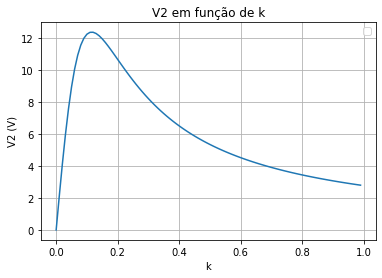

In [8]:
plt.plot(kArray, v2Array)
plt.title('V2 em função de k')
plt.xlabel('k')
plt.ylabel('V2 (V)')
plt.grid()
plt.legend()
plt.show()

### Gráfico de V2 em função dos valores de k considerando 3 frequências diferentes


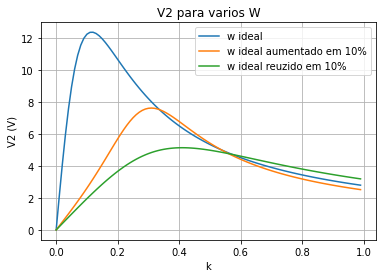

In [9]:
wideal = 1/(sqrt(l1*c1))

listaw = [wideal, wideal*1.1, wideal*0.9, 28895*2*np.pi]
nomes=['w ideal', 'w ideal aumentado em 10%', 'w ideal reuzido em 10%']
for w, nome in zip(listaw, nomes):
    v2Array = []
    v2max = []
    kArray = np.arange(0, 1, 0.01)
    for k in kArray:
        m = k * ((l1*l2)**0.5)
        xc1 = (1/(1j*w*c1))
        xc2 = (1/(1j*w*c2))
        xl1 = 1j * w * l1
        xl2 = 1j * w * l2
        xm = 1j * w * m

        v1 = (2/pi)*5
        rc = 100
        zpal = (xc2*rc)/(xc2+rc)
        Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
        V = np.array([v1, 0])
        I = np.dot(linalg.inv(Z),V)

        i1 = I[0]
        i2 = I[1]
        

        v2 = i2*zpal
        v2Array.append(abs(v2))
        ic = v2/rc
        v2check = ic*rc

    plt.plot(kArray, v2Array, label=nome)
plt.title('V2 para varios W')
plt.grid()
plt.xlabel('k')
plt.ylabel('V2 (V)')
plt.legend()
plt.show()


### Gráfico de V2 em função dos valores de k considderando a frequência do projeto real


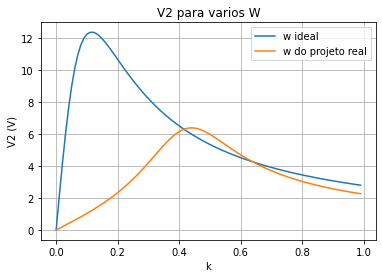

In [10]:

wideal = 1/(sqrt(l1*c1))

listaw = [wideal, 28895*2*np.pi]
nomes=['w ideal', 'w do projeto real']
for w, nome in zip(listaw, nomes):
    v2Array = []
    v2max = []
    kArray = np.arange(0, 1, 0.01)
    for k in kArray:
        m = k * ((l1*l2)**0.5)
        xc1 = (1/(1j*w*c1))
        xc2 = (1/(1j*w*c2))
        xl1 = 1j * w * l1
        xl2 = 1j * w * l2
        xm = 1j * w * m

        v1 = (2/pi)*5
        rc = 100
        zpal = (xc2*rc)/(xc2+rc)
        Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
        V = np.array([v1, 0])
        I = np.dot(linalg.inv(Z),V)

        i1 = I[0]
        i2 = I[1]
        

        v2 = i2*zpal
        v2Array.append(abs(v2))
        ic = v2/rc
        v2check = ic*rc

    plt.plot(kArray, v2Array, label=nome)
plt.title('V2 para varios W')
plt.grid()
plt.xlabel('k')
plt.ylabel('V2 (V)')
plt.legend()
plt.show()







  